In [11]:
from requests import *
from Constants import *
from API_serv import *
from Local_serv import *
from Team import *
from Player import *


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)


# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#create instances of all teams in the league in Class, Team
NHL_teams = get_active_teams()

Team 1 New Jersey Devils Created
Team 2 New York Islanders Created
Team 3 New York Rangers Created
Team 4 Philadelphia Flyers Created
Team 5 Pittsburgh Penguins Created
Team 6 Boston Bruins Created
Team 7 Buffalo Sabres Created
Team 8 Montréal Canadiens Created
Team 9 Ottawa Senators Created
Team 10 Toronto Maple Leafs Created
Team 12 Carolina Hurricanes Created
Team 13 Florida Panthers Created
Team 14 Tampa Bay Lightning Created
Team 15 Washington Capitals Created
Team 16 Chicago Blackhawks Created
Team 17 Detroit Red Wings Created
Team 18 Nashville Predators Created
Team 19 St. Louis Blues Created
Team 20 Calgary Flames Created
Team 21 Colorado Avalanche Created
Team 22 Edmonton Oilers Created
Team 23 Vancouver Canucks Created
Team 24 Anaheim Ducks Created
Team 25 Dallas Stars Created
Team 26 Los Angeles Kings Created
Team 28 San Jose Sharks Created
Team 29 Columbus Blue Jackets Created
Team 30 Minnesota Wild Created
Team 52 Winnipeg Jets Created
Team 53 Arizona Coyotes Created
Team 

In [3]:
#create instances of all players in the league in Class, Player
NHL_players = get_active_players()

Player 8473541 Jonathan Bernier Created
Player 8480789 Oliver Wahlstrom Created
Player 8470860 Jaroslav Halak Created
Player 8474715 Cam Atkinson Created
Player 8474009 Nick Bonino Created
Player 8471873 Anton Stralman Created
Player 8467950 Craig Anderson Created
Player 8477497 Sean Monahan Created
Player 8476341 Anton Forsberg Created
Player 8474162 Jake Muzzin Created
Player 8474157 Max Pacioretty Created
Player 8471887 Patric Hornqvist Created
Player 8470621 Corey Perry Created
Player 8474176 Carl Hagelin Created
Player 8471774 Alex Stalock Created
Player 8479992 Michael Rasmussen Created
Player 8474697 Mark Borowiecki Created
Player 8471306 Thomas Greiss Created
Player 8481592 Jakob Pelletier Created
Player 8476234 Keith Kinkaid Created
Player 8476850 Ryan Murray Created
Player 8475171 Oliver Ekman-Larsson Created
Player 8476932 Anthony Stolarz Created
Player 8470600 Ryan Suter Created
Player 8471303 Alexander Edler Created
Player 8478906 Markus Nutivaara Created
Player 8478460 Za

In [4]:
# let's create that league roster dataframe by starting with a list of players
list_player_data = []
for i in range(0,len(Player.all)):
    list_player_data.append(Player.all[i].details)


In [5]:
## create a dataframe of all players from the list of their dictionay containing their player profile
player_df = pd.DataFrame(list_player_data)
player_df.head()

,id,fullName,link,firstName,lastName,primaryNumber,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,nationality,height,weight,active,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,currentTeam,primaryPosition
0,8473541,Jonathan Bernier,/api/v1/people/8473541,Jonathan,Bernier,45,1988-08-07,34,Laval,QC,CAN,CAN,"6' 0""",185,True,False,False,False,L,I,"{'id': 1, 'name': 'New Jersey Devils', 'link': '/api/v1/teams/1'}","{'code': 'G', 'name': 'Goalie', 'type': 'Goalie', 'abbreviation': 'G'}"
1,8480789,Oliver Wahlstrom,/api/v1/people/8480789,Oliver,Wahlstrom,26,2000-06-13,22,Portland,ME,USA,USA,"6' 2""",204,True,False,False,False,R,Y,"{'id': 2, 'name': 'New York Islanders', 'link': '/api/v1/teams/2'}","{'code': 'R', 'name': 'Right Wing', 'type': 'Forward', 'abbreviation': 'RW'}"
2,8470860,Jaroslav Halak,/api/v1/people/8470860,Jaroslav,Halak,41,1985-05-13,37,Bratislava,NaN,SVK,SVK,"5' 11""",189,True,False,False,False,L,Y,"{'id': 3, 'name': 'New York Rangers', 'link': '/api/v1/teams/3'}","{'code': 'G', 'name': 'Goalie', 'type': 'Goalie', 'abbreviation': 'G'}"
3,8474715,Cam Atkinson,/api/v1/people/8474715,Cam,Atkinson,89,1989-06-05,33,Riverside,CT,USA,USA,"5' 8""",176,True,False,False,False,R,I,"{'id': 4, 'name': 'Philadelphia Flyers', 'link': '/api/v1/teams/4'}","{'code': 'R', 'name': 'Right Wing', 'type': 'Forward', 'abbreviation': 'RW'}"
4,8474009,Nick Bonino,/api/v1/people/8474009,Nick,Bonino,13,1988-04-20,35,Hartford,CT,USA,USA,"6' 1""",195,True,False,False,False,L,I,"{'id': 5, 'name': 'Pittsburgh Penguins', 'link': '/api/v1/teams/5'}","{'code': 'C', 'name': 'Center', 'type': 'Forward', 'abbreviation': 'C'}"


In [6]:
#player selection
Selected_Player = 'Cam Atkinson'
my_guy = Player.select_player(Selected_Player)

In [7]:
#fetch his game log
gamelog_df = pd.json_normalize(my_guy.game_log)

#create dataframe to numarically encode
encoded_df = gamelog_df
#create a categorial variable for if the player scored in each game
encoded_df['stat.didScore'] = encoded_df['stat.goals'].apply(lambda x: 1 if x != 0 else 0)
#convert time data to seconds
encoded_df['stat.timeOnIce'] = encoded_df['stat.timeOnIce'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
encoded_df['stat.evenTimeOnIce'] = encoded_df['stat.evenTimeOnIce'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
encoded_df['stat.powerPlayTimeOnIce'] = encoded_df['stat.powerPlayTimeOnIce'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
encoded_df['stat.shortHandedTimeOnIce'] = encoded_df['stat.shortHandedTimeOnIce'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
encoded_df.head()

,season,date,isHome,isWin,isOT,stat.timeOnIce,stat.assists,stat.goals,stat.pim,stat.shots,stat.games,stat.hits,stat.powerPlayGoals,stat.powerPlayPoints,stat.powerPlayTimeOnIce,stat.evenTimeOnIce,stat.penaltyMinutes,stat.shotPct,stat.gameWinningGoals,stat.overTimeGoals,stat.shortHandedGoals,stat.shortHandedPoints,stat.shortHandedTimeOnIce,stat.blocked,stat.plusMinus,stat.points,stat.shifts,team.id,team.name,team.link,opponent.id,opponent.name,opponent.link,game.gamePk,game.link,game.content.link,stat.faceOffPct,stat.didScore
0,20212022,2022-04-12,False,False,False,308,0,0,0,2,1,0,0,0,0,270,0,0.0,0,0,0,0,38,1,-1,0,8,4,Philadelphia Flyers,/api/v1/teams/4,15,Washington Capitals,/api/v1/teams/15,2021021170,/api/v1/game/2021021170/feed/live,/api/v1/game/2021021170/content,NaN,0
1,20212022,2022-04-09,True,False,False,1032,0,0,0,0,1,2,0,0,121,820,0,NaN,0,0,0,0,91,0,0,0,23,4,Philadelphia Flyers,/api/v1/teams/4,24,Anaheim Ducks,/api/v1/teams/24,2021021145,/api/v1/game/2021021145/feed/live,/api/v1/game/2021021145/content,50.0,0
2,20212022,2022-04-07,False,True,False,1051,0,0,0,4,1,0,0,0,297,678,0,0.0,0,0,0,0,76,0,-1,0,23,4,Philadelphia Flyers,/api/v1/teams/4,29,Columbus Blue Jackets,/api/v1/teams/29,2021021131,/api/v1/game/2021021131/feed/live,/api/v1/game/2021021131/content,NaN,0
3,20212022,2022-04-05,True,False,False,1022,0,0,0,3,1,0,0,0,236,786,0,0.0,0,0,0,0,0,0,-2,0,22,4,Philadelphia Flyers,/api/v1/teams/4,29,Columbus Blue Jackets,/api/v1/teams/29,2021021118,/api/v1/game/2021021118/feed/live,/api/v1/game/2021021118/content,NaN,0
4,20212022,2022-04-03,False,True,False,1200,0,0,0,2,1,0,0,0,142,901,0,0.0,0,0,0,0,157,2,-1,0,30,4,Philadelphia Flyers,/api/v1/teams/4,3,New York Rangers,/api/v1/teams/3,2021021103,/api/v1/game/2021021103/feed/live,/api/v1/game/2021021103/content,NaN,0


In [9]:
#selecting the variables of value for a goal prediction: the "is" columns, the "stat" columns
encoded_df = encoded_df.filter(regex='^(is|stat)')
# we have to drop data for number of goals and points, these are redundant-related data that will unfairly influence our prediction.
encoded_df = encoded_df.drop(['stat.goals','stat.points'], axis=1)

In [10]:
encoded_df.head()


,isHome,isWin,isOT,stat.timeOnIce,stat.assists,stat.pim,stat.shots,stat.games,stat.hits,stat.powerPlayGoals,stat.powerPlayPoints,stat.powerPlayTimeOnIce,stat.evenTimeOnIce,stat.penaltyMinutes,stat.shotPct,stat.gameWinningGoals,stat.overTimeGoals,stat.shortHandedGoals,stat.shortHandedPoints,stat.shortHandedTimeOnIce,stat.blocked,stat.plusMinus,stat.shifts,stat.faceOffPct,stat.didScore
0,False,False,False,308,0,0,2,1,0,0,0,0,270,0,0.0,0,0,0,0,38,1,-1,8,NaN,0
1,True,False,False,1032,0,0,0,1,2,0,0,121,820,0,NaN,0,0,0,0,91,0,0,23,50.0,0
2,False,True,False,1051,0,0,4,1,0,0,0,297,678,0,0.0,0,0,0,0,76,0,-1,23,NaN,0
3,True,False,False,1022,0,0,3,1,0,0,0,236,786,0,0.0,0,0,0,0,0,0,-2,22,NaN,0
4,False,True,False,1200,0,0,2,1,0,0,0,142,901,0,0.0,0,0,0,0,157,2,-1,30,NaN,0


In [12]:
print(encoded_df.isna().any())

isHome                       False
isWin                        False
isOT                         False
stat.timeOnIce               False
stat.assists                 False
stat.pim                     False
stat.shots                   False
stat.games                   False
stat.hits                    False
stat.powerPlayGoals          False
stat.powerPlayPoints         False
stat.powerPlayTimeOnIce      False
stat.evenTimeOnIce           False
stat.penaltyMinutes          False
stat.shotPct                  True
stat.gameWinningGoals        False
stat.overTimeGoals           False
stat.shortHandedGoals        False
stat.shortHandedPoints       False
stat.shortHandedTimeOnIce    False
stat.blocked                 False
stat.plusMinus               False
stat.shifts                  False
stat.faceOffPct               True
stat.didScore                False
dtype: bool


In [13]:
#for shooting percentage, we need to fill NaN. We impute the average shooting percentage.
encoded_df['stat.shotPct'].fillna(encoded_df['stat.shotPct'].mean(), inplace=True)
#for faceoff percentage, a little cleaner code
encoded_df['stat.faceOffPct'].fillna(encoded_df['stat.faceOffPct'].mean(), inplace=True)

In [14]:
#now we need to separate the variable we are to predict
Y = encoded_df['stat.didScore'].to_numpy()
#we then drop the variable we wish to predict from the data and process it 
X = encoded_df.drop(['stat.didScore'],axis=1)
#Standardize features by removing the mean and scaling to unit variance.
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X.shape

(73, 24)

In [15]:
#split the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
#define a confusion matrix plot for quick view of testing results
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not score', 'score']); ax.yaxis.set_ticklabels(['did not score', 'scored'])

/home/brien/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/brien/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/brien/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/brien/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    r

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of the best params:  1.0
accuracy of the model on test reserved data:  0.9333333333333333


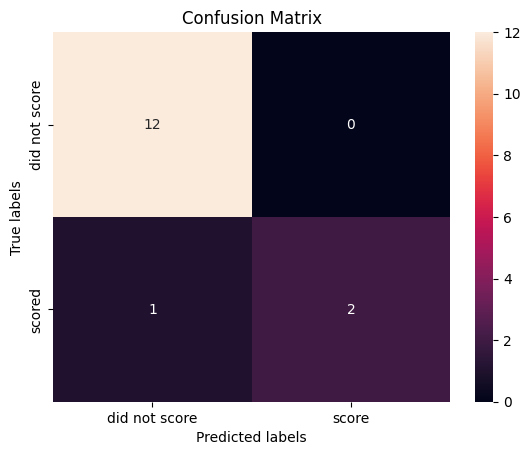

In [17]:
#Logistic Regression Method

LR_model = LogisticRegression(random_state=42)

#grid search for best params
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
}


LR_gridsearch = GridSearchCV(LR_model, param_grid, cv=10)
LR_gridsearch.fit(X_train, Y_train)
print(LR_gridsearch.best_params_)
print("Accuracy of the best params: ", LR_gridsearch.best_score_)

#make predictions
yhat=LR_gridsearch.predict(X_test)

print("accuracy of the model on test reserved data: ", LR_gridsearch.score(X_test,Y_test))
plot_confusion_matrix(Y_test,yhat)
